## Knight network & random walk

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize

In [0]:
def get_knight_network(border_size = 8):

    '''
        Simulate a chess board, with fixed border size
        Parameters:
        --------
            border_size: int value of border size
        Returns:
        --------
            networkx graph
            pos: position layout of the knight network
    
    '''
    node_matrix = np.arange(border_size * border_size).reshape((border_size,border_size))
    offsets = [(1,-2),(1,2),(2,1),(2,-1),(-1,2),(-1,-2),(-2,1),(-2,-1)]

    edge_list = []
    pos = {}
    for row in range(border_size):
        for col in range(border_size):
            pos[node_matrix[row,col]] = np.array((col,row)) / border_size
            edge_list += [
                        (node_matrix[row,col], node_matrix[row + row_off,col + col_off]) 
                            for row_off,col_off in offsets
                                if row_off + row <border_size and row_off + row >=0 and col_off + col < border_size and col_off + col >=0
                        ]

    return nx.from_edgelist(edge_list), pos

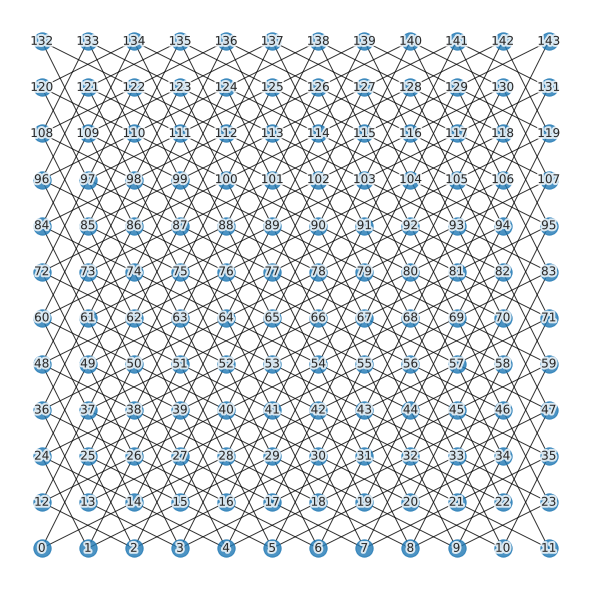

In [0]:
G,pos = get_knight_network(12)
figsize(8,8)
nx.draw(G,pos = pos,alpha = .8,with_labels = True)

In [0]:
def random_walk_simulation(G, xi = 0, n = 100,till_first_return = False):
    '''
        Simulate random walk process on any graph
        Parameters:
        --------
            G: networkx graph
            xi: initial node to start from, node name
            n: number of steps to go, int value
            till_first_return: boolean, run fixed steps or only go to the initial node - return
        Returns:
        --------
            A list of nodes represents the walking history
    '''

    node_seq = [xi]
    x = xi
    if till_first_return:
        while True:
            x = np.random.choice(list(G.neighbors(x)))
            node_seq.append(x)
            if x == xi:
                return node_seq
    else:
        for i in range(n):
            x = np.random.choice(list(G.neighbors(x)))
            node_seq.append(x)

    return node_seq

### 马走日随机游走

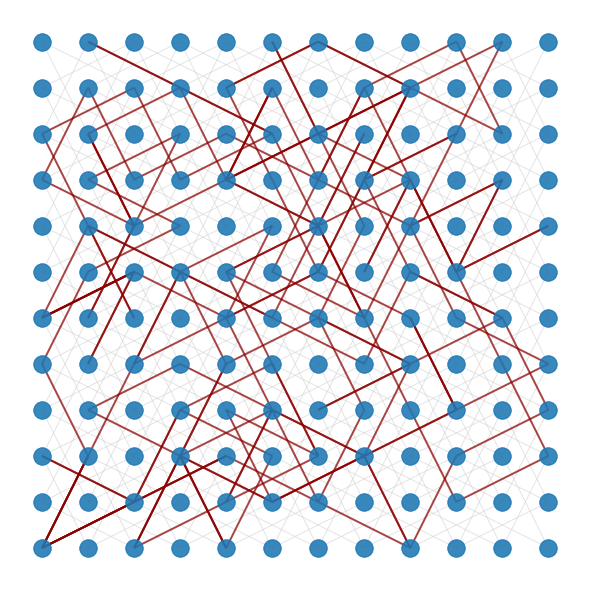

In [0]:
sequence = random_walk_simulation(G,0,200)
edge_sequence = [(sequence[i-1],sequence[i]) for i,n in enumerate(sequence) if i >0]
nx.draw(G,pos = pos,alpha = .6, edge_color='lightgray')
nx.draw(G,edgelist = edge_sequence,edge_color = 'darkred',width = 2,alpha = .7,pos = pos)

### Node distribution

In [0]:
node_list = []
for n in G.nodes():
    node_list.append(random_walk_simulation(G,n,1000))

node_list = [n for l in node_list for n in l]

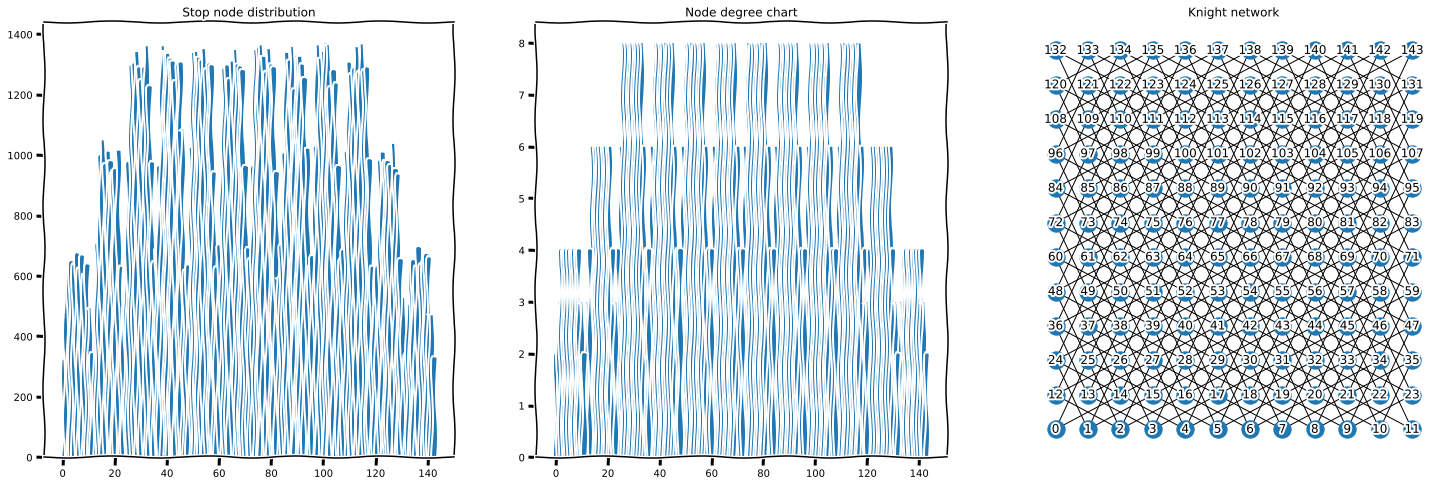

In [0]:
figsize(25,8)
plt.subplot(1,3,1)
plt.hist(node_list,bins = G.number_of_nodes())
plt.title("Stop node distribution")

plt.subplot(1,3,2)
ns,ds =[],[]
for n,d in dict(G.degree()).items():
    ns.append(n)
    ds.append(d)
plt.bar(ns,ds)
plt.title("Node degree chart")

plt.subplot(1,3,3)
nx.draw(G,with_labels = True,pos = pos)
plt.title("Knight network")
plt.show()

**Random walk converges to stationary distributtion (proportioal to node degrees)**

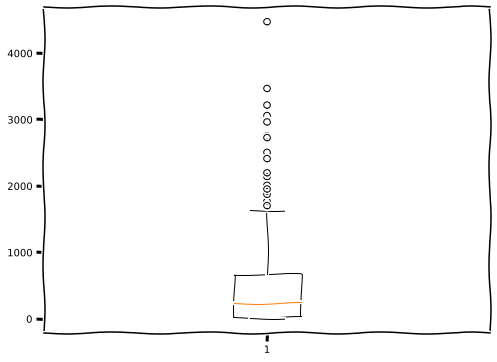

In [0]:
returntime = []
for i in range(1000):
    returntime.append( len(random_walk_simulation(G, xi = 0,till_first_return = True)) )

figsize(8,6)
plt.boxplot(returntime)
plt.show()